### Image classification model

In [34]:
#importing all the necessary libraries
bimport matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [37]:
# assigning labels to multiclass images, there are three classes of images as labelled below 
labels = ['saree', 'jeans','trousers']
img_size = 224
# defining a function to import the downloaded images into the model
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [38]:
# importing train and test data by providing the path 
train = get_data('C:/Users/sudha/OneDrive/Desktop/Input/train')
val = get_data('C:/Users/sudha/OneDrive/Desktop/Input/test')

<ipython-input-37-27005d8934a0>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


E:\Anaconda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

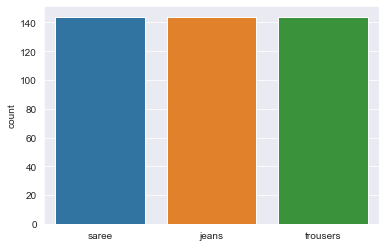

In [104]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("saree")
    elif(i[1] == 1):
        l.append("jeans")
    elif(i[1] == 2):
        l.append("trousers")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'saree')

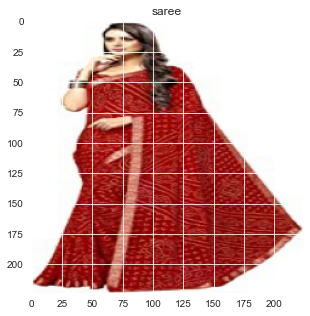

In [44]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'trousers')

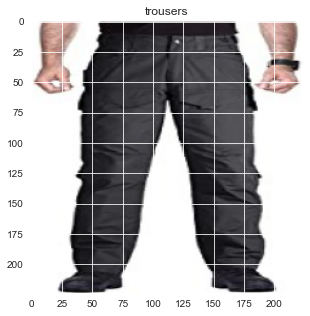

In [45]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [58]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)
x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [51]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [64]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(3, activation="softmax"))

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 64)       

In [69]:
# optimizer Adam
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [70]:
history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))


Epoch 1/10
14/14 [==============================] - 290s 20s/step - loss: 0.9297 - accuracy: 0.6246 - val_loss: 0.9177 - val_accuracy: 0.6510TA: 47s - loss: 0.9276 - accuracy
Epoch 2/10
14/14 [==============================] - 55s 4s/step - loss: 0.9326 - accuracy: 0.6563 - val_loss: 0.9031 - val_accuracy: 0.6198
Epoch 3/10
14/14 [==============================] - 45s 3s/step - loss: 0.9425 - accuracy: 0.5977 - val_loss: 0.8873 - val_accuracy: 0.6094
Epoch 4/10
14/14 [==============================] - 43s 3s/step - loss: 0.9153 - accuracy: 0.5997 - val_loss: 0.8725 - val_accuracy: 0.6198
Epoch 5/10
14/14 [==============================] - 42s 3s/step - loss: 0.8878 - accuracy: 0.6426 - val_loss: 0.8597 - val_accuracy: 0.6406
Epoch 6/10
14/14 [==============================] - 42s 3s/step - loss: 0.8845 - accuracy: 0.6363 - val_loss: 0.8462 - val_accuracy: 0.6458
Epoch 7/10
14/14 [==============================] - 43s 3s/step - loss: 0.8673 - accuracy: 0.6515 - val_loss: 0.8331 - val_ac

In [80]:
# optimizer RMSprop
model2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(3, activation='softmax')
])

In [81]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 64)       

In [86]:
from tensorflow.keras.optimizers import RMSprop
model2.compile(optimizer = RMSprop(lr=0.001) , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [87]:
history = model2.fit(x_train,y_train,epochs = 10)

Epoch 1/10
14/14 [==============================] - 40s 2s/step - loss: 1.1575 - accuracy: 0.3435TA: 36s - loss: 1.1580 -
Epoch 2/10
14/14 [==============================] - 26s 2s/step - loss: 0.9371 - accuracy: 0.5541
Epoch 3/10
14/14 [==============================] - 26s 2s/step - loss: 0.7061 - accuracy: 0.6618
Epoch 4/10
14/14 [==============================] - 26s 2s/step - loss: 0.5737 - accuracy: 0.7398
Epoch 5/10
14/14 [==============================] - 25s 2s/step - loss: 0.5587 - accuracy: 0.7522
Epoch 6/10
14/14 [==============================] - 25s 2s/step - loss: 0.4046 - accuracy: 0.8383
Epoch 7/10
14/14 [==============================] - 26s 2s/step - loss: 0.4317 - accuracy: 0.8069
Epoch 8/10
14/14 [==============================] - 26s 2s/step - loss: 0.5172 - accuracy: 0.7941
Epoch 9/10
14/14 [==============================] - 27s 2s/step - loss: 0.3115 - accuracy: 0.8823
Epoch 10/10
14/14 [==============================] - 26s 2s/step - loss: 0.3010 - accuracy: 0.

In [111]:
#  testing the models
# As RMSprop gives the high accuracy compared to Adam
# RMSprop is being applied on the test data 
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('C:\\Users\\sudha\\OneDrive\\Desktop\\Input\\train\\trousers\\7.jpg', target_size = (224,224))
test_image2 = image.load_img('C:\\Users\\sudha\\OneDrive\\Desktop\\Input\\train\\jeans\\7.jpg', target_size = (224,224))
test_image3 = image.load_img('C:\\Users\\sudha\\OneDrive\\Desktop\\Input\\train\\saree\\7.jpg', target_size = (224,224))
#test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image2 = np.expand_dims(test_image2, axis=0)
test_image3 = np.expand_dims(test_image3, axis=0)

result = model2.predict(test_image)
result2 = model2.predict(test_image2)
result3 = model2.predict(test_image3)



In [112]:
def print_result(result):
    if result[0][0] == 1:
        print("Saree")
    elif result[0][1] == 1:
        print("Jeans")
    elif result[0][2] == 1:
        print("Trousers")

In [113]:
# for the given test image, the model gives the accurate result if the image is saree or jeans or trousers
print_result(result)
print_result(result2)
print_result(result3)

Trousers
Jeans
Saree


In [102]:
# Saving the model
model.save('Adam.h5')
model2.save('RMSProp.h5')